<a href="https://colab.research.google.com/github/NajlaZuhir/CRM_Data/blob/main/targeted_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#required imports
import os
import json
import datetime
import pymongo
import pprint
import pandas as pd
import numpy as np
from pymongo import MongoClient
print('Mongo version', pymongo.__version__)

Mongo version 3.12.0


C:\Users\Uni\AppData\Local\Temp\ipykernel_8672\3598108141.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
client = MongoClient('localhost', 27017)
db = client.assignment1

In [ ]:
# Let's delete any existing collections in our database
db.customers.drop()


# Import our files into our three collections
with open('mod.json.json') as f:
    db.customers.insert_many(json.load(f))

In [ ]:
pprint.pprint(client.assignment1.customers.find_one())

{'Age': 78,
 'Best_Attraction': 'Katara Cultural Village',
 'Cuisine': 'Indian',
 'Days_of_Stay': 15,
 'Frequency_of_Travel': 'Occasional',
 'Gender': 'Female',
 'Hobby': 'Photography',
 'Hotel_Type': 'Mid-Range',
 'ID': 1001,
 'Location': 'Umm Salal Mohammed',
 'Modes_of_Travel': 'Air',
 'Name': 'Kimberly Martinez',
 'Nationality': 'Faroe Islands',
 'Num_of_Visits': 5,
 'Occupation': 'Teacher',
 'Preferred_Travel_Seasons': 'Summer',
 'Random_Event_Type': 'Marathon',
 'Rating_of_Services': 3,
 'Room_Preferences': 'Single',
 'Subscribed_to_Loyalty_Program': False,
 'Total_Spendings': 13776,
 'Transportation_Mode': 'Car',
 '_id': ObjectId('65becab0caa253209d7ccc5b'),
 'annual_income': 50789,
 'arrival_month': 2,
 'arrival_nationality': 'Other Asia inc. Oceania',
 'city': 'Lake Megan',
 'climate_preferences': 'Arctic',
 'country_address': 'Poland',
 'family_size': 4,
 'health_insurance': 'Yes',
 'payment_preferences': 'Bank Transfer',
 'state': 'New Jersey',
 'street_address': '9469 Richa

#### AI-Profiling Start

In [ ]:
# imports
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Feature Selection
selected_features = ['Age', 'Days_of_Stay', 'Total_Spendings', 'Num_of_Visits', 'Rating_of_Services']

cursor = db.customers.find({})
df = pd.DataFrame(list(cursor))
X = df[selected_features].values

# Step 3: Scale the Data (Optional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Step 4: Apply K-means Clustering Algorithm
wcss = []  # Within-cluster sum of squares
silhouette_scores = []  # Silhouette scores

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)


C:\Users\Uni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Uni\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Uni\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\Uni\anaconda3\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\Uni\anaconda3\lib\subprocess.py", line 971, in 

Not needed

Text(0, 0.5, 'Within-Cluster Sum of Squares (WCSS)')

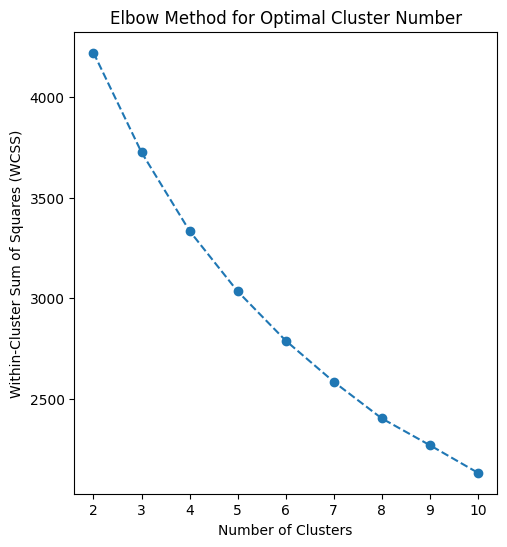

In [ ]:
# Plotting the elbow curve and silhouette scores
plt.figure(figsize=(12, 6))

# Plot WCSS
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')


In [ ]:
# Continue with your existing code for clustering with the optimal_k
num_clusters_elbow = 2  # Number of clusters suggested by the Elbow Method
num_clusters_silhouette = 10  # Number of clusters suggested by the Silhouette Score

# Choose the smaller of the two values
optimal_k = min(num_clusters_elbow, num_clusters_silhouette)
print("Optimal k-value:", optimal_k)

# Continue with your existing code for clustering with the optimal_k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Display the cluster centers and sizes
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))
print("\nCluster Sizes:")
print(df['cluster'].value_counts())

# Add Cluster Labels to MongoDB Collection
for index, row in df.iterrows():
    db.customers.update_one({'_id': row['_id']}, {'$set': {'cluster': int(row['cluster'])}})


Optimal k-value: 2


C:\Users\Uni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Uni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Cluster Centers:
[[4.77917485e+01 3.16601179e+01 1.62304558e+04 3.59332024e+00
  4.24361493e+00]
 [4.90610998e+01 3.31792261e+01 1.59440509e+04 4.48472505e+00
  1.77596741e+00]]

Cluster Sizes:
cluster
0    509
1    491
Name: count, dtype: int64


In [ ]:
# Remove the 'cluster' column
#df = df.drop(columns=['cluster'])

# If you want to update the MongoDB collection as well
#for index, row in df.iterrows():
 #   db.customers.update_one({'_id': row['_id']}, {'$unset': {'cluster': 1}})


### VISUALIZATION OF CLUSTERS

In [ ]:
# pip install mpl_toolkits

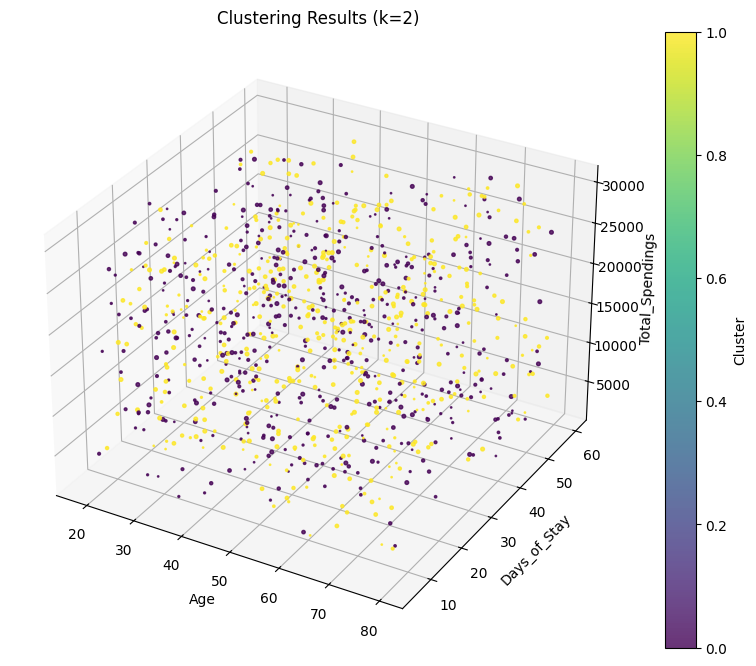

In [ ]:
# Import necessary packages for 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df['Age'], df['Days_of_Stay'], df['Total_Spendings'],
                     c=df['cluster'], s=df['Num_of_Visits'], cmap='viridis', alpha=0.8)

# Customize the layout
ax.set_title(f'Clustering Results (k={optimal_k})')
ax.set_xlabel('Age')
ax.set_ylabel('Days_of_Stay')
ax.set_zlabel('Total_Spendings')

# Add colorbar
cbar = fig.colorbar(scatter)
cbar.set_label('Cluster')

# Show the plot
plt.show()


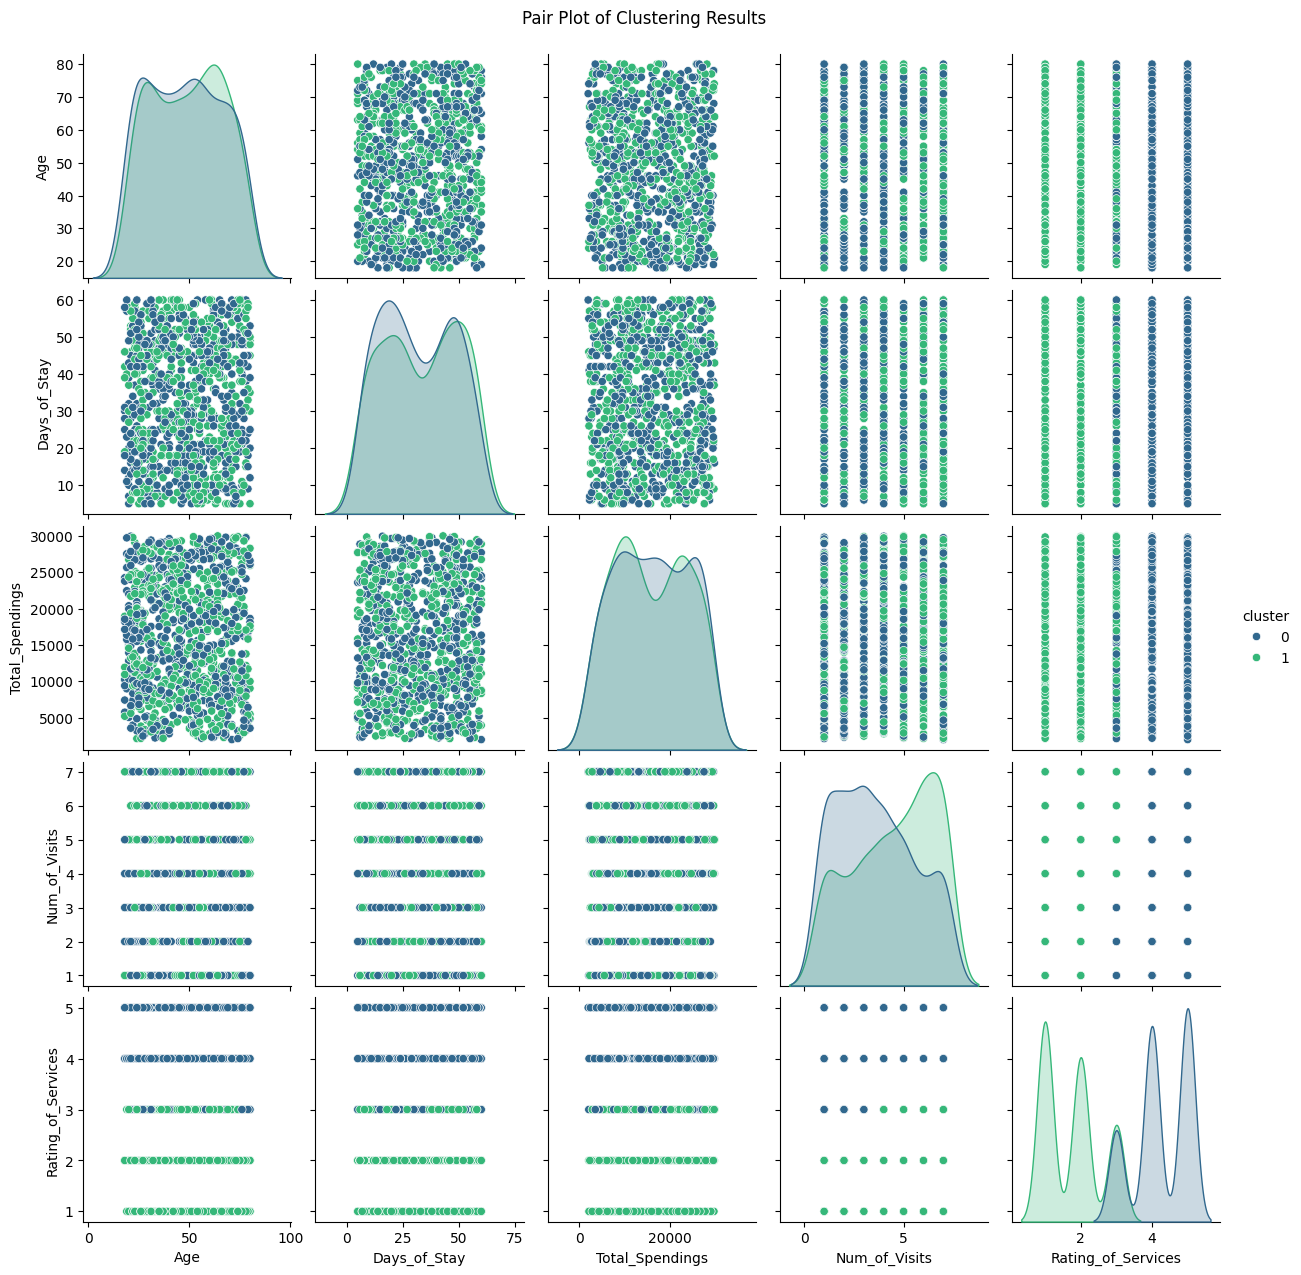

In [ ]:
# Pair plot
sns.pairplot(df[['Age', 'Days_of_Stay', 'Total_Spendings', 'Num_of_Visits', 'Rating_of_Services','cluster']], hue='cluster', palette='viridis', diag_kind='kde', markers='o', height=2.5)
plt.suptitle('Pair Plot of Clustering Results', y=1.02)
plt.show()


Since i cannot really understand the clusters YET, I will attempt to randomly assign names

In [ ]:
# Create a new column 'package_category' based on cluster assignment or other criteria
df['package_category'] = 'Unknown'  # Default value

# Define criteria for each package category based on your insights
economy_criteria = (df['cluster'] == 0)
medium_criteria = (df['cluster'] == 1)
luxury_criteria = (df['cluster'] == 2)  # Assuming three clusters

# Assign package categories based on criteria
df.loc[economy_criteria, 'package_category'] = 'Economy'
df.loc[medium_criteria, 'package_category'] = 'Medium'
df.loc[luxury_criteria, 'package_category'] = 'Luxury'

# Print the count of customers in each package category
print("Package Category Counts:")
print(df['package_category'].value_counts())


Package Category Counts:
package_category
Economy    509
Medium     491
Name: count, dtype: int64


In [ ]:
import random

# Define packages for each category
economy_packages = ['Staycation', 'Budget Hotels', 'Weekend Getaway']
medium_packages = ['City Tour Package', 'Family Retreat', 'Adventure Package']
luxury_packages = ['Luxury Spa Retreat', '5-Star Resort Experience', 'Exclusive Cruise']

# Create a new column 'selected_package' to store the assigned package for each customer
df['selected_package'] = 'Unknown'

# Function to randomly assign a package based on category
def assign_package(row):
    if row['package_category'] == 'Economy':
        return random.choice(economy_packages)
    elif row['package_category'] == 'Medium':
        return random.choice(medium_packages)
    elif row['package_category'] == 'Luxury':
        return random.choice(luxury_packages)
    else:
        return 'Unknown'

# Apply the function to assign packages
df['selected_package'] = df.apply(assign_package, axis=1)

# Print the selected packages for each category
print("Selected Packages:")
print(df[['package_category', 'selected_package']])

# Update the MongoDB collection with the selected packages
for index, row in df.iterrows():
    db.customers.update_one({'_id': row['_id']}, {'$set': {'selected_package': row['selected_package']}})


Selected Packages:
    package_category   selected_package
0             Medium     Family Retreat
1             Medium  City Tour Package
2            Economy         Staycation
3            Economy    Weekend Getaway
4            Economy         Staycation
..               ...                ...
995           Medium  City Tour Package
996           Medium  Adventure Package
997          Economy    Weekend Getaway
998           Medium  City Tour Package
999           Medium  City Tour Package

[1000 rows x 2 columns]


## AS fUNCTIONS

In [ ]:
import random

def assign_categories_and_packages(df, cluster_column, package_lists):
    """
    Assigns package categories and randomly selects packages for each customer based on cluster assignment.

    Parameters:
    - df: DataFrame containing customer data.
    - cluster_column: Name of the column containing cluster assignments.
    - package_lists: Dictionary containing lists of packages for each category.

    Returns:
    - Updated DataFrame with 'package_category' and 'selected_package' columns.
    """

    # Create a new column 'package_category' based on cluster assignment
    df['package_category'] = df[cluster_column].apply(lambda cluster: assign_category(cluster, len(package_lists)))

    # Create a new column 'selected_package' to store the assigned package for each customer
    df['selected_package'] = df.apply(lambda row: assign_package(row, package_lists), axis=1)

    return df



In [ ]:
def assign_category(cluster, num_categories):
    """
    Assigns a package category based on cluster assignment.

    Parameters:
    - cluster: Cluster assignment for a customer.
    - num_categories: Number of categories.

    Returns:
    - Package category ('Economy', 'Medium', 'Luxury', etc.).
    """
    return f'Category_{cluster % num_categories}'


In [ ]:

def assign_package(row, package_lists):
    """
    Randomly assigns a package based on package category.

    Parameters:
    - row: Row of the DataFrame representing a customer.
    - package_lists: Dictionary containing lists of packages for each category.

    Returns:
    - Selected package.
    """
    category = row['package_category']
    return random.choice(package_lists.get(category, ['Unknown']))



In [ ]:
# Define packages for each category
package_lists = {
    'Category_0': ['Package_1', 'Package_2', 'Package_3'],
    'Category_1': ['Package_A', 'Package_B', 'Package_C'],
    'Category_2': ['Package_X', 'Package_Y', 'Package_Z']
}

# Call the function to assign categories and packages
df_result = assign_categories_and_packages(df, 'cluster', package_lists)

# Print the selected packages for each category
print("Selected Packages:")
print(df_result[['package_category', 'selected_package']])

# Update the MongoDB collection with the selected packages
for index, row in df_result.iterrows():
    db.customers.update_one({'_id': row['_id']}, {'$set': {'selected_package': row['selected_package']}})


Selected Packages:
    package_category selected_package
0         Category_1        Package_A
1         Category_1        Package_B
2         Category_0        Package_3
3         Category_0        Package_1
4         Category_0        Package_1
..               ...              ...
995       Category_1        Package_B
996       Category_1        Package_B
997       Category_0        Package_3
998       Category_1        Package_A
999       Category_1        Package_C

[1000 rows x 2 columns]
